In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

#### Cost Prediction Task
- Predict cost on media campaigns in food mart of USA
- cost의 단위는 Dollar

In [3]:
df = pd.read_csv('../dataset/cost_prediction/media prediction and its cost.csv')
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [5]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,0.558665,0.350434,18.860694,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,0.496551,0.477110,10.258555,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,0.000000,0.000000,10.000000,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [6]:
# No null values
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

C:\Users\이승우학부휴학컴퓨터학과\AppData\Local\Temp\ipykernel_15840\152612443.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), cmap="magma", annot=True)


<AxesSubplot: >

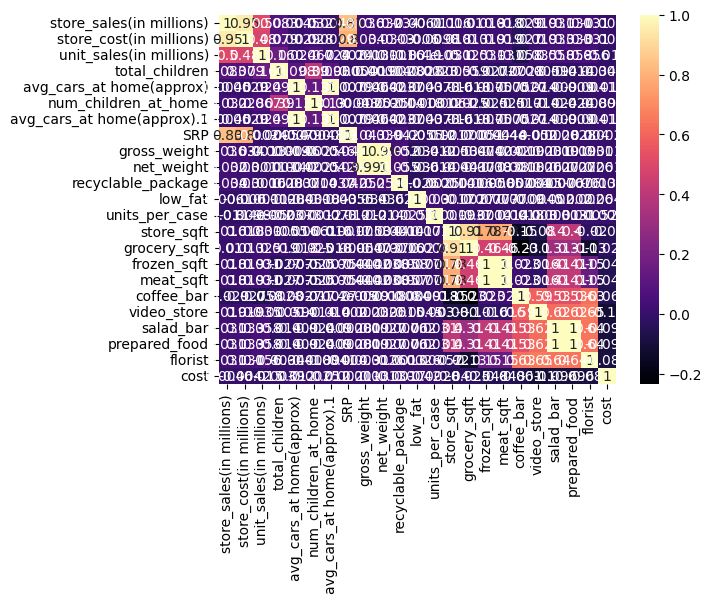

In [7]:
sns.heatmap(data=df.corr(), cmap="magma", annot=True)

#### Heatmap으로 상관관계 시각화
##### Strong correlation을 보이는 것 끼리 일단 정리해봄

- `store_sales` & `store_cost`가 0.95
- `avg_cars_at home(approx)` & `avg_cars_at home(approx).1`이 1을 찍음
- `net_weight` & `gross_weight`는 0.99로 마찬가지로 높음.
- `prepared_food` & `salad_bar`도 마찬가지
- `meat_sqft` & `frozen_sqft`도 1을 기록함
- `grocery_sqft` & `store_sqft`가 0.91
- `SRP` & `store_sales`, `SRP` & `store_cost`가 0.8 이상 

Correlated features will not always worsen your model, but they will not always improve it either.

There are three main reasons why you would remove correlated features:

- Make the learning algorithm faster
- Decrease harmful bias
- Interpretability of your model

그래서 저 위에서 하나씩 drop하기로 결정

In [8]:
df = df.drop(columns=['salad_bar', 'gross_weight', 'avg_cars_at home(approx).1', 'meat_sqft', 'store_sales(in millions)', 'store_sqft', 'store_cost(in millions)'])

In [9]:
df.head()

,food_category,food_department,food_family,unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,brand_name,SRP,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Carrington,1.84,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Carrington,1.84,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Carrington,1.84,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Carrington,1.84,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Golden,1.36,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Radio,50.79


In [10]:
df.describe()

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,recyclable_package,low_fat,units_per_case,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,3.093169,2.533875,2.200271,0.829351,2.115258,11.796289,0.558665,0.350434,18.860694,19133.799696,5312.852552,0.612646,0.354157,0.587956,0.562603,99.262366
std,0.827677,1.490165,1.109644,1.303424,0.932829,4.682986,0.496551,0.477110,10.258555,3987.395735,1575.907263,0.487150,0.478261,0.492207,0.496069,30.011257
min,1.000000,0.000000,0.000000,0.000000,0.500000,3.050000,0.000000,0.000000,1.000000,13305.000000,2452.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.000000,1.000000,1.000000,0.000000,1.410000,7.710000,0.000000,0.000000,10.000000,16232.000000,4746.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,3.000000,3.000000,2.000000,0.000000,2.130000,11.600000,1.000000,0.000000,19.000000,18670.000000,5062.000000,1.000000,0.000000,1.000000,1.000000,98.520000
75%,4.000000,4.000000,3.000000,1.000000,2.790000,16.000000,1.000000,1.000000,28.000000,22123.000000,5751.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,6.000000,5.000000,4.000000,5.000000,3.980000,20.800000,1.000000,1.000000,36.000000,30351.000000,9184.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [11]:
df.dtypes

food_category                object
food_department              object
food_family                  object
unit_sales(in millions)     float64
promotion_name               object
sales_country                object
marital_status               object
gender                       object
total_children              float64
education                    object
member_card                  object
occupation                   object
houseowner                   object
avg_cars_at home(approx)    float64
avg. yearly_income           object
num_children_at_home        float64
brand_name                   object
SRP                         float64
net_weight                  float64
recyclable_package          float64
low_fat                     float64
units_per_case              float64
store_type                   object
store_city                   object
store_state                  object
grocery_sqft                float64
frozen_sqft                 float64
coffee_bar                  

C:\Users\이승우학부휴학컴퓨터학과\AppData\Local\Temp\ipykernel_15840\152612443.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), cmap="magma", annot=True)


<AxesSubplot: >

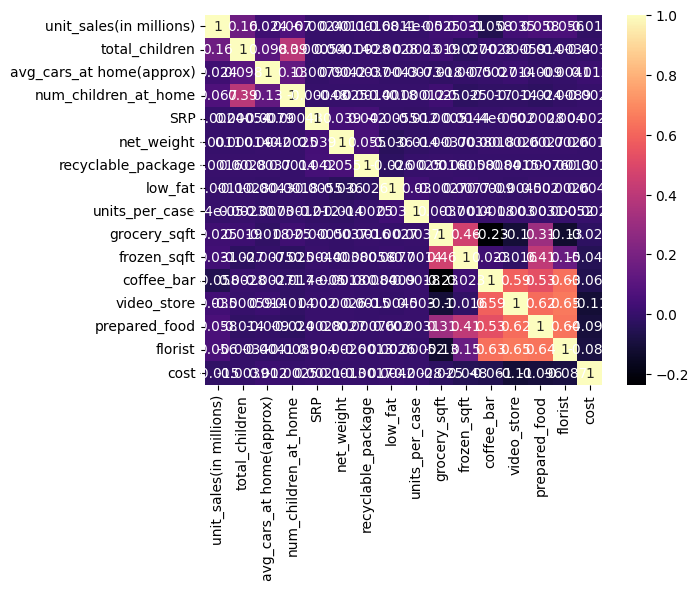

In [12]:
sns.heatmap(data=df.corr(), cmap="magma", annot=True)

In [13]:
# 일단 object형이 아닌 column들 뽑아보기
from pandas.api.types import is_string_dtype
numeric_columns = []

for col in df.columns:
    if(not is_string_dtype(df[col])):
        numeric_columns.append(col)

len(numeric_columns)

16

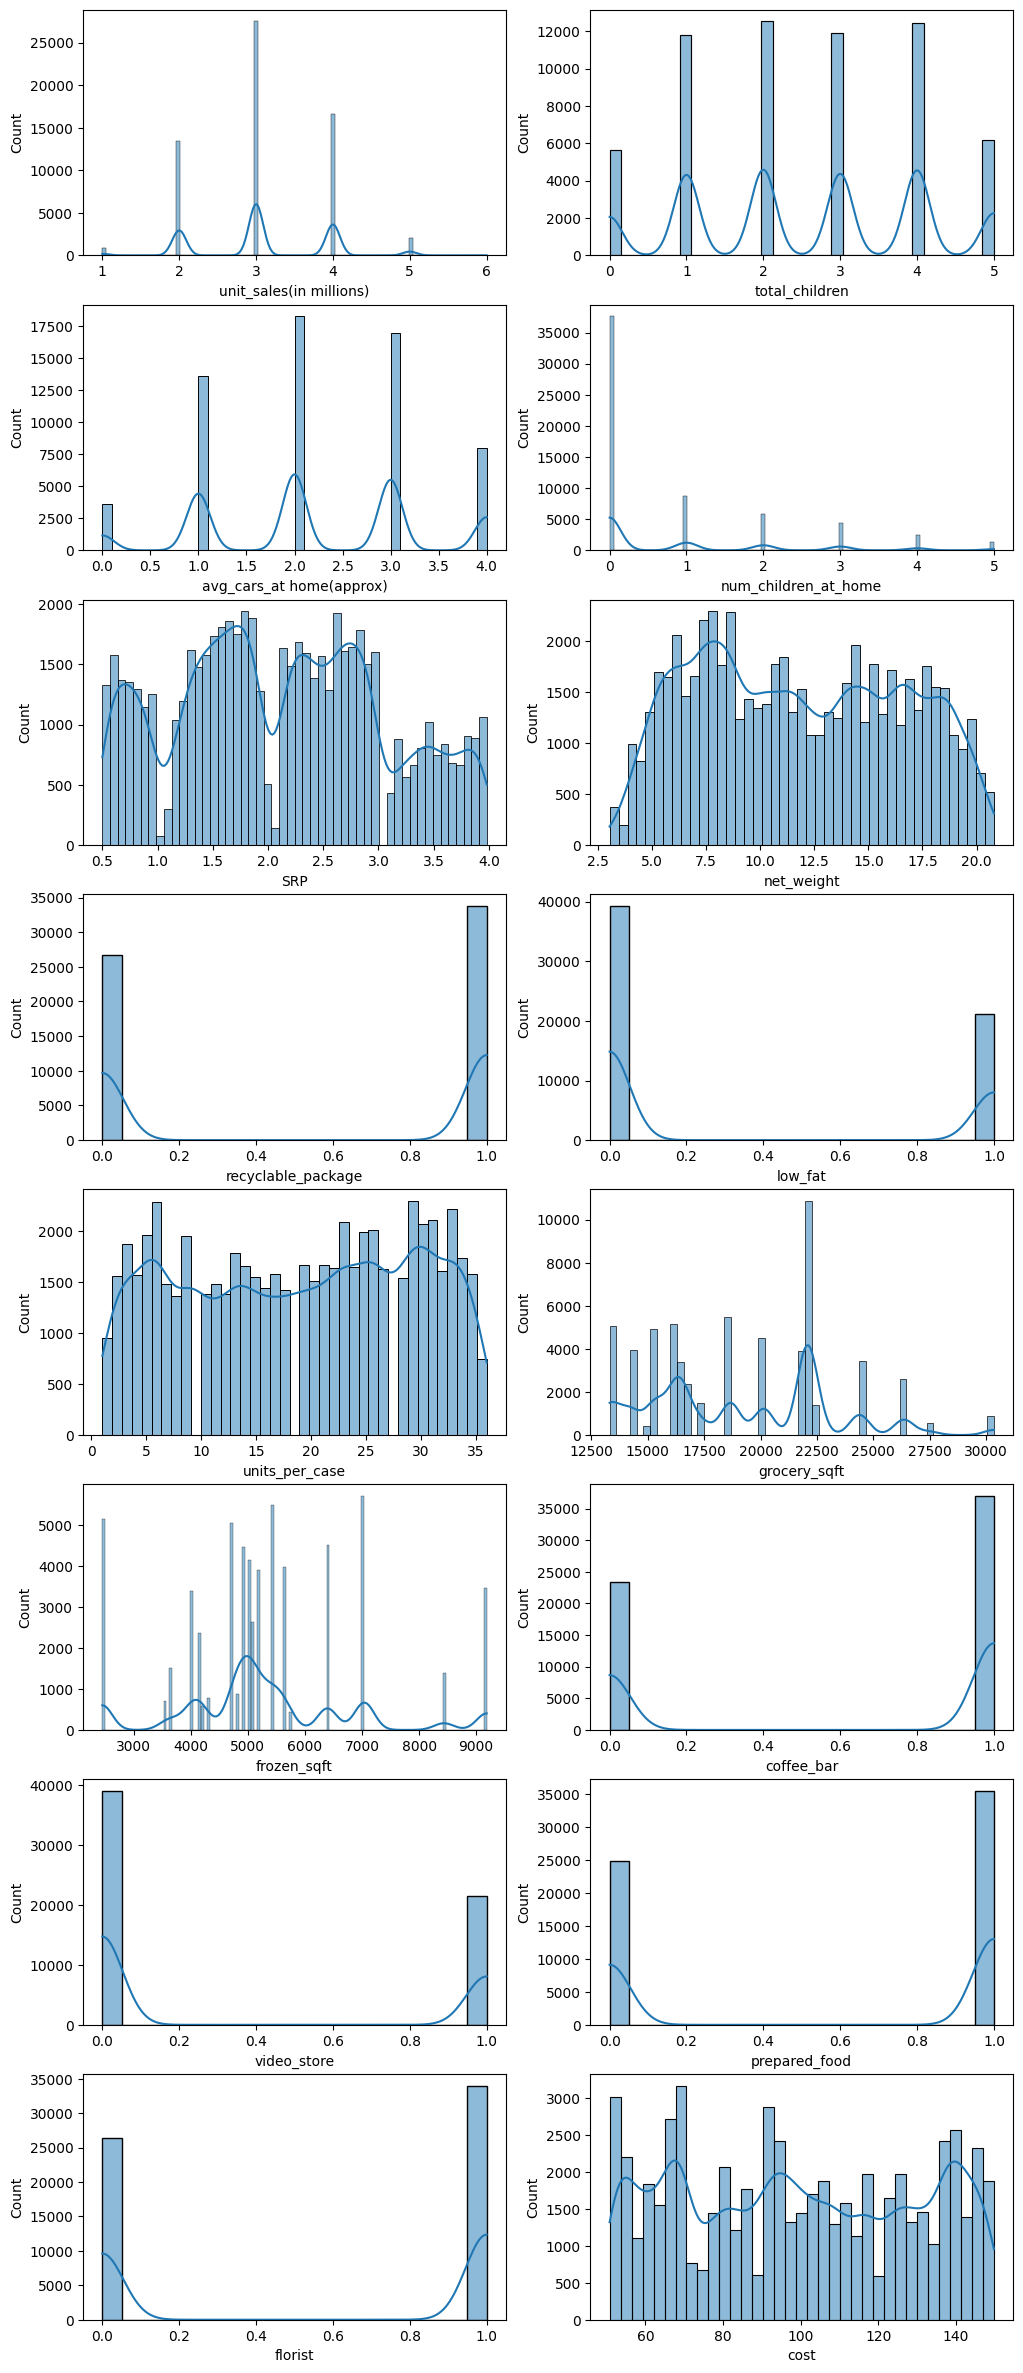

In [14]:
# subplots 그려보기
cnt=0
fig, ax = plt.subplots(8, 2, figsize=(12, 30))
for i in range(8):
    for j in range(2):
        sns.histplot(ax = ax[i, j], data=df, x=numeric_columns[cnt], kde=True)
        cnt += 1

In [17]:
#표로 그려보기
df[df['media_type'] == 'TV']['cost']

31        95.74
39        95.74
100      108.22
104       72.61
111      114.98
          ...  
60340    137.55
60347     65.70
60348     65.70
60350     68.91
60364     65.70
Name: cost, Length: 3576, dtype: float64

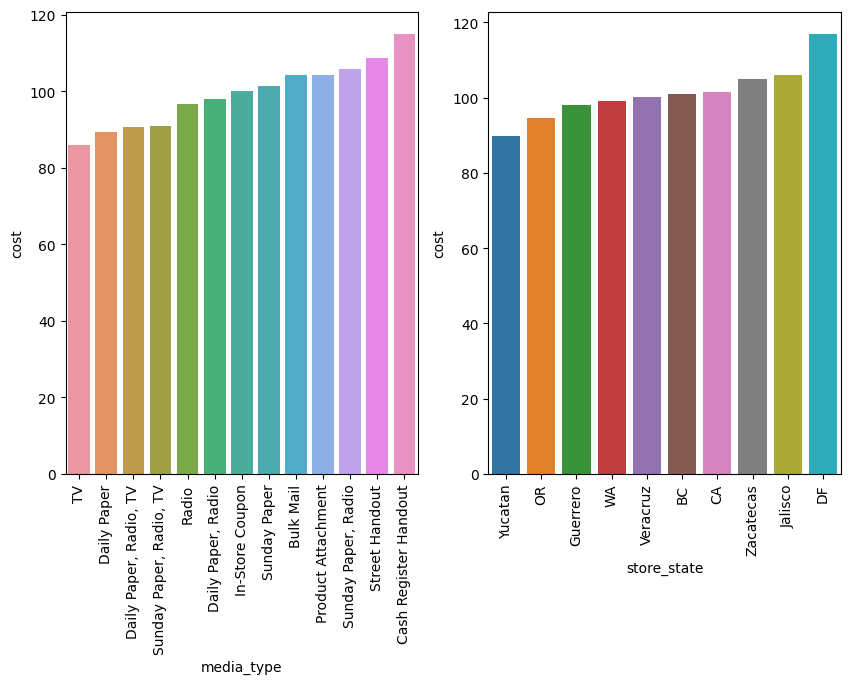

In [24]:
# 내가 생각하는거 그려보기

media_data = df.groupby(df['media_type'])['cost'].mean().sort_values().to_frame().reset_index()
location_data = df.groupby(df['store_state'])['cost'].mean().sort_values().to_frame().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(ax = ax[0], data=media_data, x='media_type', y='cost')
ax[0].tick_params(axis='x', rotation=90)
sns.barplot(ax = ax[1], data=location_data, x='store_state', y='cost')
ax[1].tick_params(axis='x', rotation=90)

In [20]:
media_data.head(10)

,media_type,cost
0,TV,85.941692
1,Daily Paper,89.223149
2,"Daily Paper, Radio, TV",90.753003
3,"Sunday Paper, Radio, TV",90.965377
4,Radio,96.703759
5,"Daily Paper, Radio",97.971450
6,In-Store Coupon,99.993493
7,Sunday Paper,101.230712
8,Bulk Mail,104.087744
9,Product Attachment,104.336822


In [23]:
df.head()

,food_category,food_department,food_family,unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,brand_name,SRP,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Carrington,1.84,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Carrington,1.84,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Carrington,1.84,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Carrington,1.84,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Golden,1.36,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,18670.0,5415.0,1.0,1.0,1.0,1.0,Radio,50.79
